Head of the DataFrame:
   sensor_count  avg_speed time_of_day congestion_level
0             4  21.723781     morning           medium
1            17  17.319749     morning              low
2             3  54.550117       night             high
3            13  59.453301       night             high
4             9  12.211030     evening           medium

Shape: (100, 4)

Data Types:
 sensor_count          int64
avg_speed           float64
time_of_day          object
congestion_level     object
dtype: object

Missing Values:
 sensor_count        0
avg_speed           0
time_of_day         0
congestion_level    0
dtype: int64

Summary Statistics:
        sensor_count   avg_speed
count     100.00000  100.000000
mean       10.22000   46.238054
std         5.52054   20.550633
min         1.00000   12.145675
25%         6.00000   27.129928
50%        11.00000   46.616181
75%        15.00000   62.527872
max        19.00000   79.743374


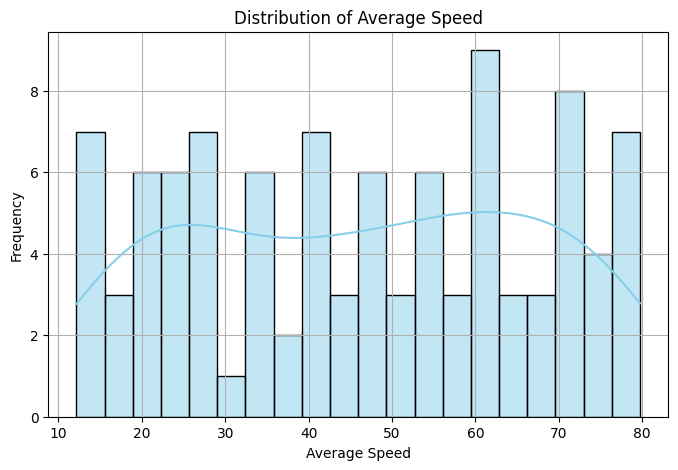

<ipython-input-17-381299552799>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sensors.index, y=avg_sensors.values, palette='magma')


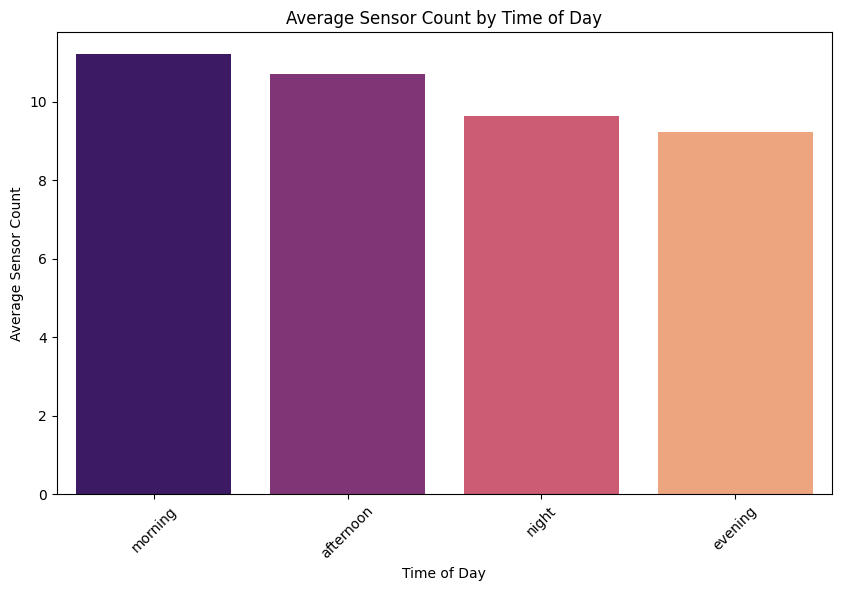

<ipython-input-17-381299552799>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='congestion_level', y='avg_speed', palette='Set2')


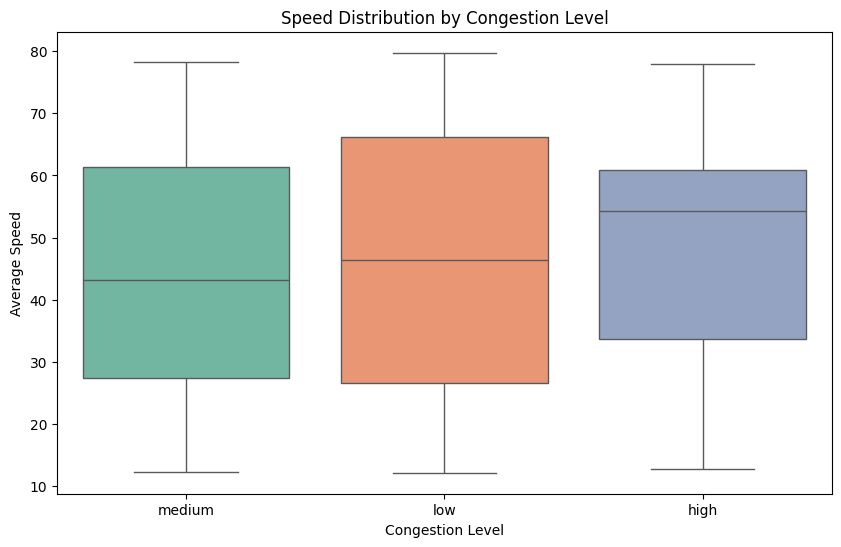

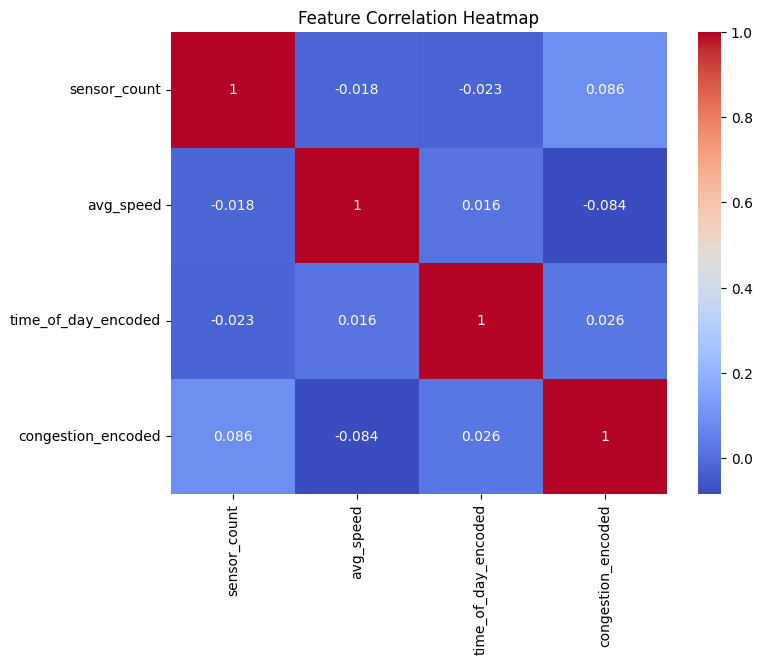


Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         4
         low       0.38      0.43      0.40         7
      medium       0.50      0.44      0.47         9

    accuracy                           0.35        20
   macro avg       0.29      0.29      0.29        20
weighted avg       0.36      0.35      0.35        20



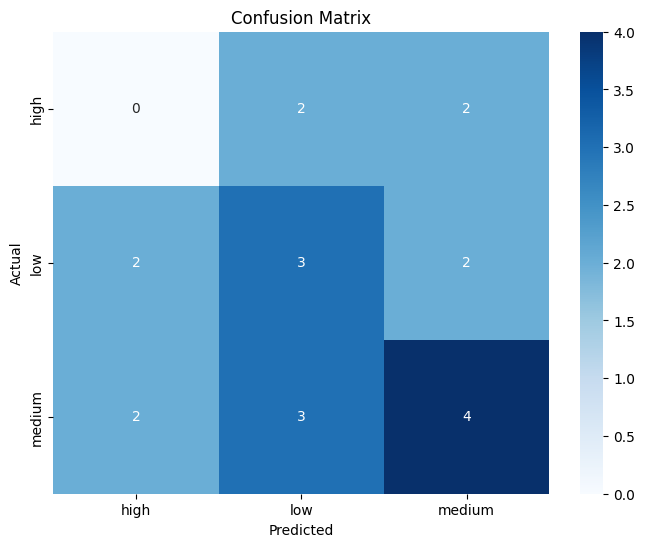

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/traffic_congestion (1).csv')

# Display basic information
print("Head of the DataFrame:")
print(df.head())
print("\nShape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

# Encode categorical columns
le_time = LabelEncoder()
df['time_of_day_encoded'] = le_time.fit_transform(df['time_of_day'])

le_congestion = LabelEncoder()
df['congestion_encoded'] = le_congestion.fit_transform(df['congestion_level'])

# ---------- Data Visualizations ----------

# 1. Histogram: Distribution of Average Speed
plt.figure(figsize=(8, 5))
sns.histplot(df['avg_speed'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Speed')
plt.xlabel('Average Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Bar Chart: Average Sensor Count by Time of Day
plt.figure(figsize=(10, 6))
avg_sensors = df.groupby('time_of_day')['sensor_count'].mean().sort_values(ascending=False)
sns.barplot(x=avg_sensors.index, y=avg_sensors.values, palette='magma')
plt.title('Average Sensor Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Sensor Count')
plt.xticks(rotation=45)
plt.show()

# 3. Boxplot: Speed by Congestion Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='congestion_level', y='avg_speed', palette='Set2')
plt.title('Speed Distribution by Congestion Level')
plt.xlabel('Congestion Level')
plt.ylabel('Average Speed')
plt.show()

# 4. Heatmap: Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['sensor_count', 'avg_speed', 'time_of_day_encoded', 'congestion_encoded']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# ---------- Model Training & Evaluation ----------

# Features and target
X = df[['sensor_count', 'avg_speed', 'time_of_day_encoded']]
y = df['congestion_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_congestion.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_congestion.classes_,
            yticklabels=le_congestion.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
